# Submission By : Anushkumar K.

# Automobile car pricing prediction Assignment

### Problem Statement
A Chinese automobile company Geely Auto aspires to enter the US market by setting up their manufacturing unit there and producing cars locally to give competition to their US and European counterparts. 

 

They have contracted an automobile consulting company to understand the factors on which the pricing of cars depends. Specifically, they want to understand the factors affecting the pricing of cars in the American market, since those may be very different from the Chinese market. The company wants to know:

Which variables are significant in predicting the price of a car
How well those variables describe the price of a car
Based on various market surveys, the consulting firm has gathered a large dataset of different types of cars across the Americal market. 

 

### Business Goal 

You are required to model the price of cars with the available independent variables. It will be used by the management to understand how exactly the prices vary with the independent variables. They can accordingly manipulate the design of the cars, the business strategy etc. to meet certain price levels. Further, the model will be a good way for management to understand the pricing dynamics of a new market.

# Importing the required libraries and reading the dataset

In [1]:
#Importing the required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
import warnings
warnings.filterwarnings('ignore')

#Reading the dataset
carpricing=pd.read_csv("CarPrice_Assignment.csv")

In [2]:
print(carpricing.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
car_ID              205 non-null int64
symboling           205 non-null int64
CarName             205 non-null object
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm      

In [3]:
carpricing.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


# Visualizing all variables in the dataset

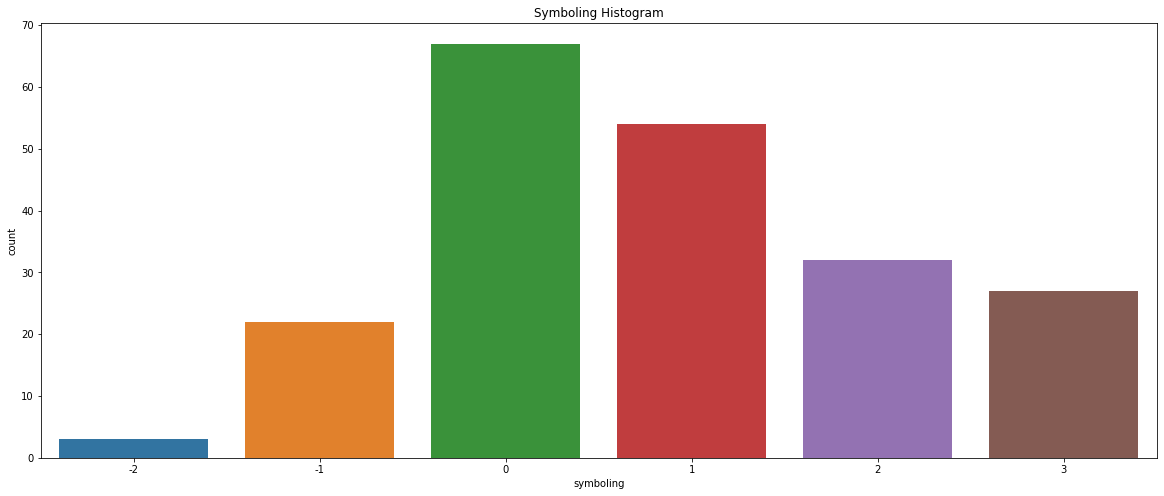

In [4]:
plt.figure(figsize=(20,8))
plt.title("Symboling Histogram")
sns.countplot(carpricing.symboling)
plt.show()

# Inference:

Most of the cars have a risk rating of 0 and 1 which means that the cars are safer.

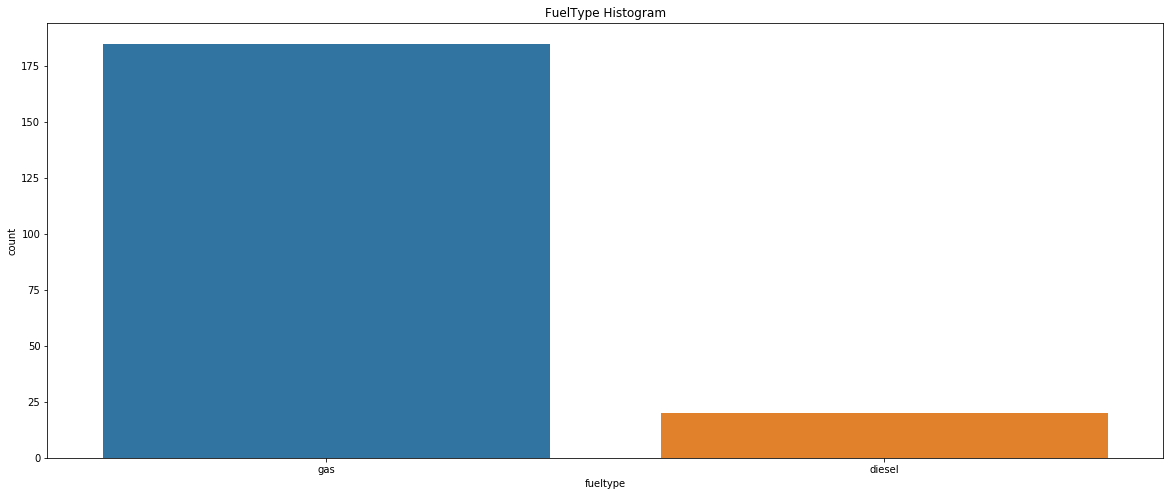

In [5]:
plt.figure(figsize=(20,8))
plt.title("FuelType Histogram")
sns.countplot(carpricing.fueltype)
plt.show()

# Inference:

Most of the cars have the fueltype as gas when compared to diesel.

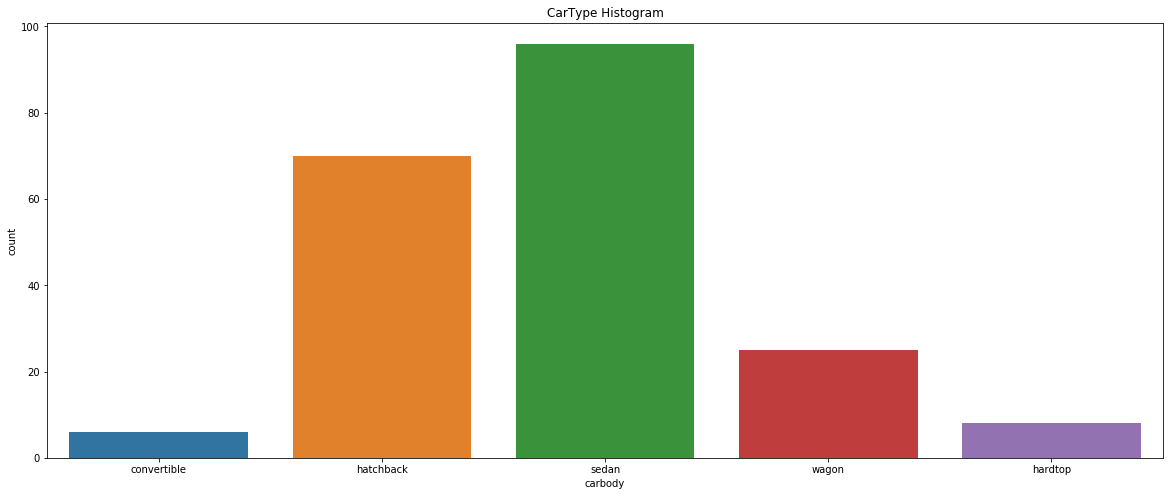

In [6]:
plt.figure(figsize=(20,8))
plt.title("CarType Histogram")
sns.countplot(carpricing.carbody)
plt.show()

# Inference:

Majority cars are of __hatchback and sedan__. So more people prefer buying only these 2 cartypes.

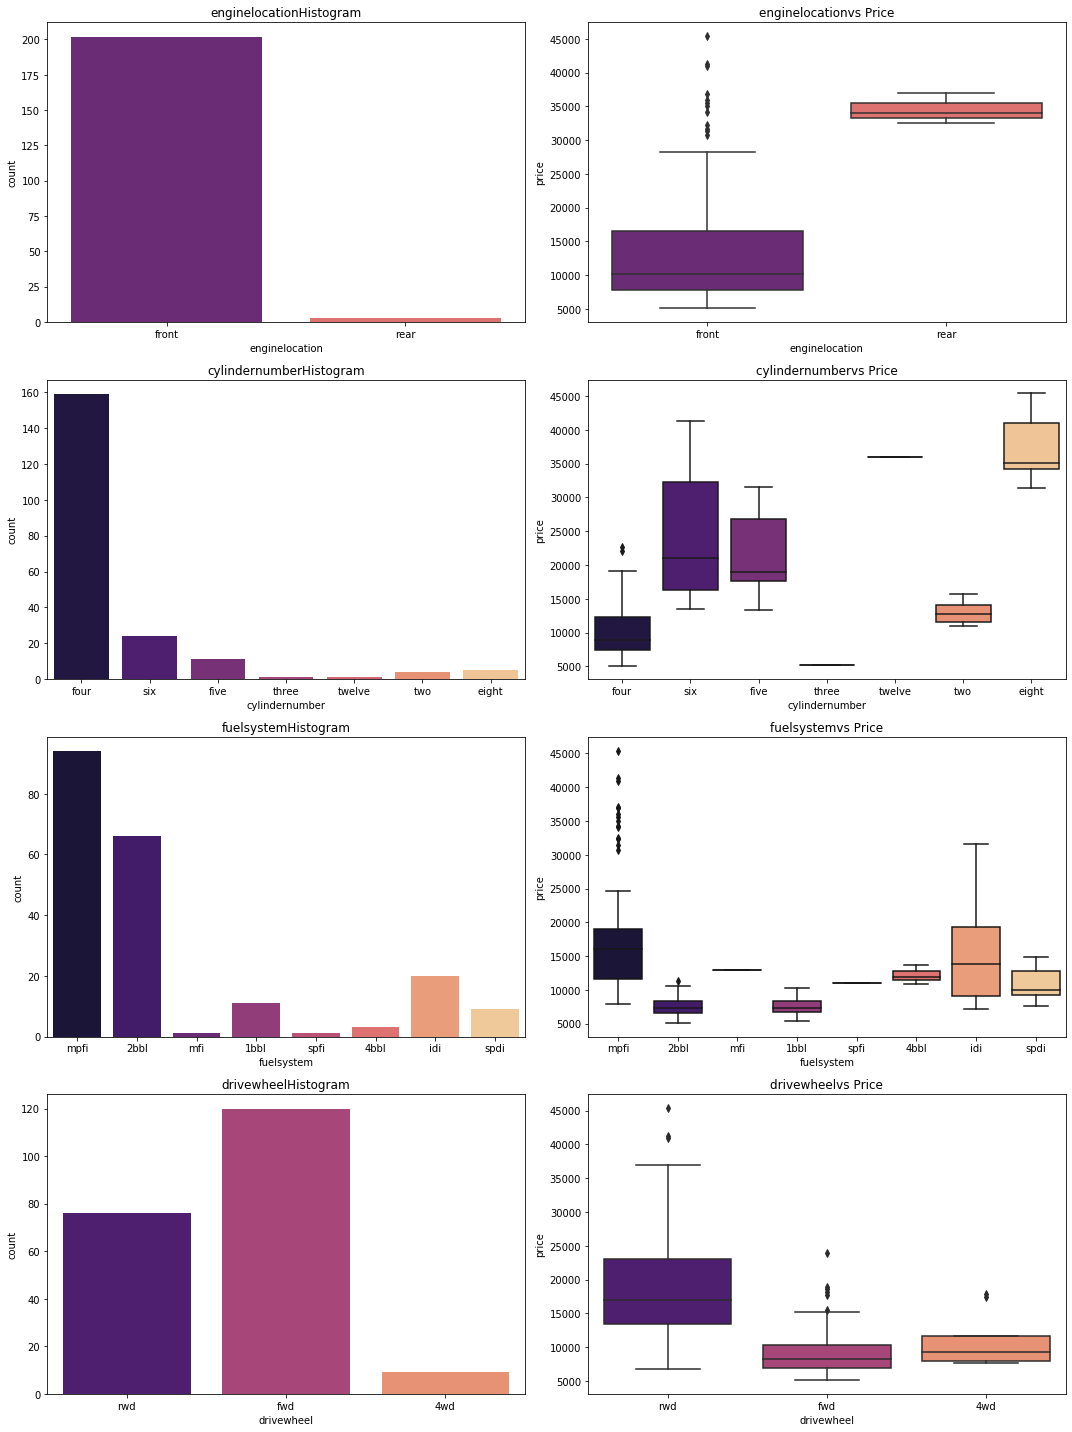

In [7]:
def plots(x,fig):
    plt.subplot(4,2,fig)
    plt.title(x+'Histogram')
    sns.countplot(carpricing[x],palette=("magma"))
    plt.subplot(4,2,(fig+1))
    plt.title(x+'vs Price')
    sns.boxplot(x=carpricing[x],y=carpricing.price,palette=("magma"))
plt.figure(figsize=(15,20))
plots('enginelocation',1)
plots('cylindernumber',3)
plots('fuelsystem',5)
plots('drivewheel',7)

plt.tight_layout()

# Inference:

Most cars have __4,5,6__ cylinders
__mpfi,2bbl__ are the most common fuel systems. __mpfi and idi__ have the highest price range
most high end cars prefer __rwd__ drivewheels

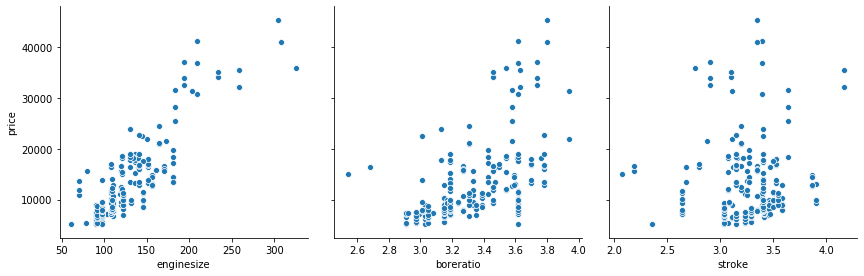

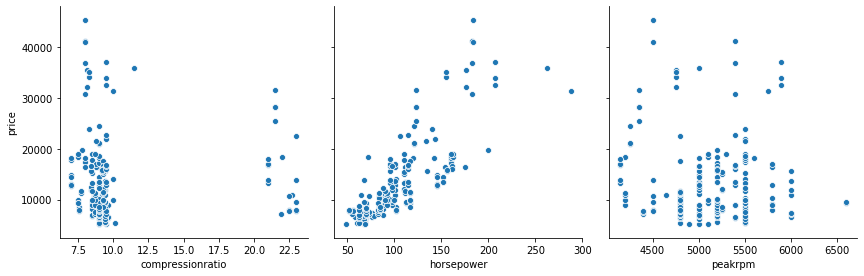

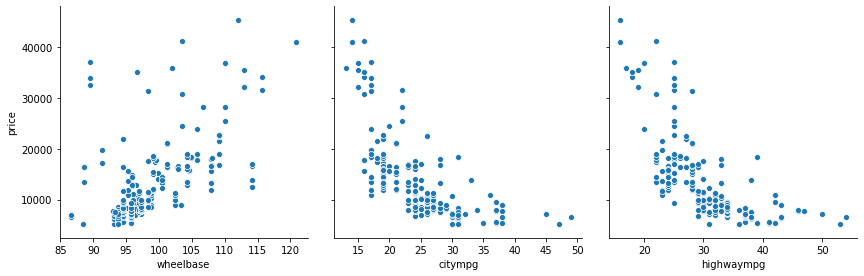

In [8]:
def pairplots(x,y,z):
    sns.pairplot(carpricing,x_vars=[x,y,z],y_vars='price',size=4,aspect=1,kind='scatter')
    plt.show()
pairplots('enginesize','boreratio','stroke')
pairplots('compressionratio','horsepower','peakrpm')
pairplots('wheelbase','citympg','highwaympg')

# Inference:

__enginesize,boreratio,horsepower,wheelbase__ have significant positive correlation with price.

__citympg and highwaympg__ have significaant negative correlation.

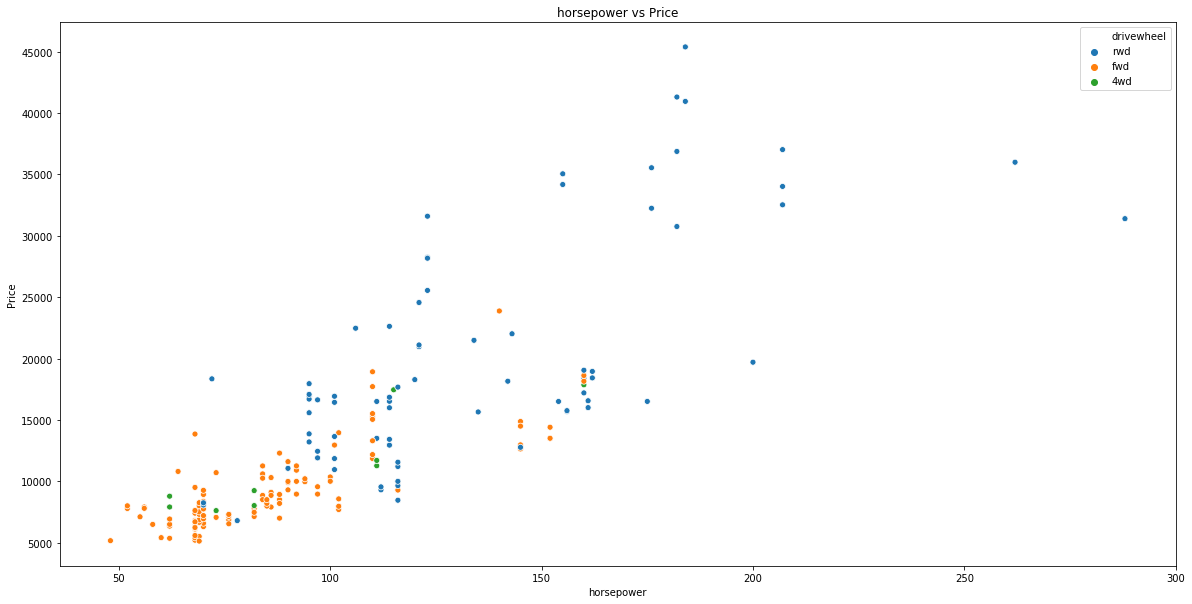

<Figure size 432x288 with 0 Axes>

In [9]:
plt.figure(figsize=(20,10))
plt.title('horsepower vs Price')
sns.scatterplot(x=carpricing['horsepower'],y=carpricing['price'],hue=carpricing['drivewheel'])
plt.xlabel('horsepower')
plt.ylabel('Price')
plt.show()
plt.tight_layout()

# Inference:

__Horsepower__ shows a significant positive correlation.

<Figure size 1800x432 with 0 Axes>

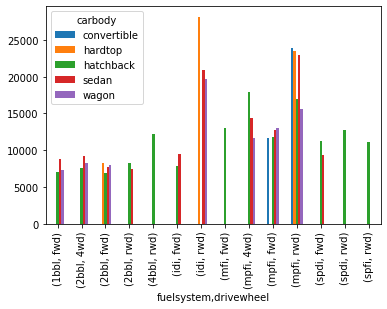

In [10]:
plt.figure(figsize=(25,6))
df=pd.DataFrame(carpricing.groupby(['fuelsystem','drivewheel','carbody'])['price'].mean().unstack(fill_value=0))
df.plot.bar()
plt.show()

# Inference:

Most __hardtop__ cars prefer __idi__ fuel system and __rwd__ drive wheels.

<Figure size 1440x720 with 0 Axes>

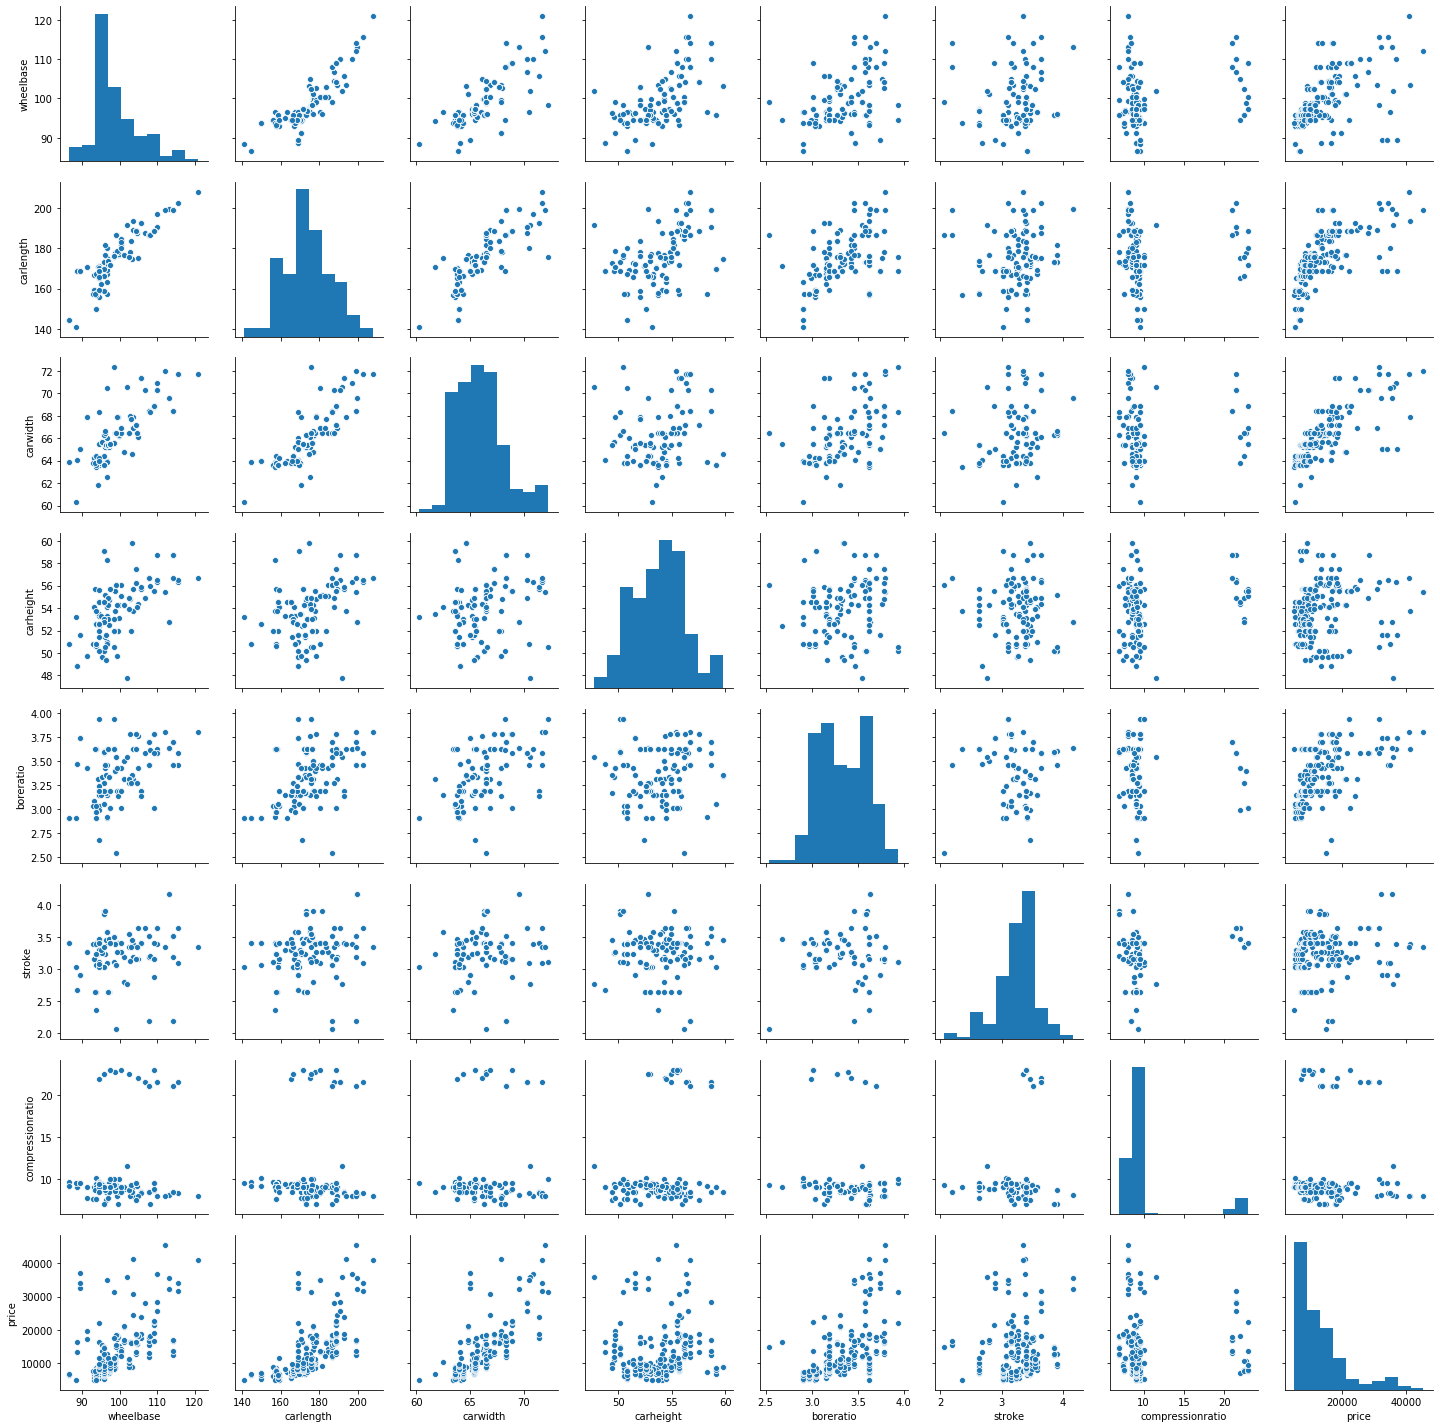

In [11]:
#pair plotting all the numeric variables in the dataframe
carpricing_num_columns=carpricing.select_dtypes(include=['float64','int'])
plt.figure(figsize=(20,10))
sns.pairplot(carpricing_num_columns)
plt.show()

In [12]:
#Correlation for each columns
correlation_carpricing = carpricing.corr()
correlation_carpricing

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
car_ID,1.000000,-0.151621,0.129729,0.170636,0.052387,0.255960,0.071962,-0.033930,0.260064,-0.160824,0.150276,-0.015006,-0.203789,0.015940,0.011255,-0.109093
symboling,-0.151621,1.000000,-0.531954,-0.357612,-0.232919,-0.541038,-0.227691,-0.105790,-0.130051,-0.008735,-0.178515,0.070873,0.273606,-0.035823,0.034606,-0.079978
wheelbase,0.129729,-0.531954,1.000000,0.874587,0.795144,0.589435,0.776386,0.569329,0.488750,0.160959,0.249786,0.353294,-0.360469,-0.470414,-0.544082,0.577816
carlength,0.170636,-0.357612,0.874587,1.000000,0.841118,0.491029,0.877728,0.683360,0.606454,0.129533,0.158414,0.552623,-0.287242,-0.670909,-0.704662,0.682920
carwidth,0.052387,-0.232919,0.795144,0.841118,1.000000,0.279210,0.867032,0.735433,0.559150,0.182942,0.181129,0.640732,-0.220012,-0.642704,-0.677218,0.759325
carheight,0.255960,-0.541038,0.589435,0.491029,0.279210,1.000000,0.295572,0.067149,0.171071,-0.055307,0.261214,-0.108802,-0.320411,-0.048640,-0.107358,0.119336
curbweight,0.071962,-0.227691,0.776386,0.877728,0.867032,0.295572,1.000000,0.850594,0.648480,0.168790,0.151362,0.750739,-0.266243,-0.757414,-0.797465,0.835305
enginesize,-0.033930,-0.105790,0.569329,0.683360,0.735433,0.067149,0.850594,1.000000,0.583774,0.203129,0.028971,0.809769,-0.244660,-0.653658,-0.677470,0.874145
boreratio,0.260064,-0.130051,0.488750,0.606454,0.559150,0.171071,0.648480,0.583774,1.000000,-0.055909,0.005197,0.573677,-0.254976,-0.584532,-0.587012,0.553173
stroke,-0.160824,-0.008735,0.160959,0.129533,0.182942,-0.055307,0.168790,0.203129,-0.055909,1.000000,0.186110,0.080940,-0.067964,-0.042145,-0.043931,0.079443


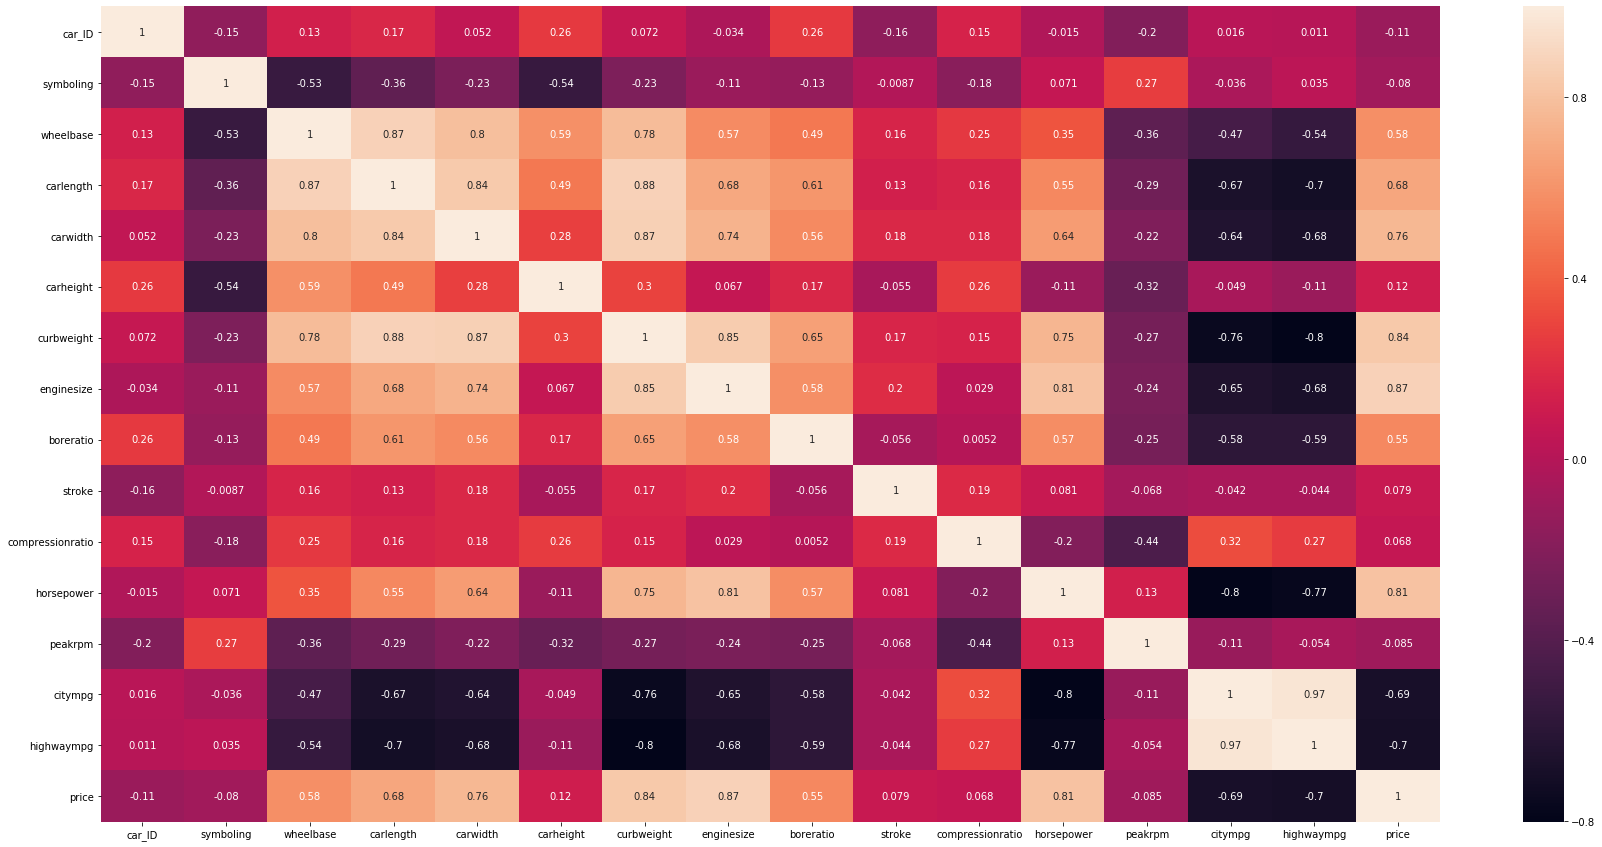

In [13]:
#heatmap to see the ocrrelations
plt.figure(figsize=(30,15))
sns.heatmap(correlation_carpricing,annot=True)
plt.show()

In [14]:
carpricing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
car_ID              205 non-null int64
symboling           205 non-null int64
CarName             205 non-null object
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm      

In [15]:
#Extracing the car company from carname
import re
carnamesplits=re.compile(r'\w+-?\w+')
carpricing['CarCompany'] = carpricing['CarName'].apply(lambda x:re.findall(carnamesplits,x)[0])
carpricing.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,CarCompany
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi


In [16]:
#Misspelled car company names
carpricing.loc[(carpricing['CarCompany']=="vw") | (carpricing['CarCompany']=="vokswagen"),'CarCompany']='volkswagen'
carpricing.loc[(carpricing['CarCompany']=="porcshce"),'CarCompany']='porsche'
carpricing.loc[(carpricing['CarCompany']=="toyouta"),'CarCompany']='toyota'
carpricing.loc[(carpricing['CarCompany']=="Nissan"),'CarCompany']='nissan'
carpricing.loc[(carpricing['CarCompany']=="maxda"),'CarCompany']='mazda'
carpricing['CarCompany'].astype('category').value_counts()

toyota         32
nissan         18
mazda          17
honda          13
mitsubishi     13
subaru         12
volkswagen     12
volvo          11
peugeot        11
dodge           9
buick           8
bmw             8
plymouth        7
audi            7
saab            6
porsche         5
isuzu           4
alfa-romero     3
chevrolet       3
jaguar          3
renault         2
mercury         1
Name: CarCompany, dtype: int64

In [17]:
#Dropping carname column
carpricing = carpricing.drop('CarName',axis=1)
carpricing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
car_ID              205 non-null int64
symboling           205 non-null int64
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm             205 non-null int64
citympg       

In [18]:
#Creating dummy variables

carpricing['fueltype']=carpricing['fueltype'].map({'gas':1,'diesel':0})
carpricing['aspiration']=carpricing['aspiration'].map({'std':1,'turbo':0})
carpricing['doornumber']=carpricing['doornumber'].map({'two':1,'four':0})
carpricing['enginelocation']=carpricing['enginelocation'].map({'front':1,'rear':0})

car_dummy_df = pd.get_dummies(carpricing['CarCompany'],drop_first=True,prefix='Company')
carpricing=pd.concat([carpricing,car_dummy_df],axis=1)
car_dummy_df = pd.get_dummies(carpricing['symboling'],drop_first=True,prefix='symboling')
carpricing=pd.concat([carpricing,car_dummy_df],axis=1)
car_dummy_df = pd.get_dummies(carpricing['carbody'],drop_first=True,prefix='carbody')
carpricing=pd.concat([carpricing,car_dummy_df],axis=1)
car_dummy_df = pd.get_dummies(carpricing['drivewheel'],drop_first=True,prefix='drivewheel')
carpricing=pd.concat([carpricing,car_dummy_df],axis=1)
car_dummy_df = pd.get_dummies(carpricing['enginetype'],drop_first=True,prefix='enginetype')
carpricing=pd.concat([carpricing,car_dummy_df],axis=1)
car_dummy_df = pd.get_dummies(carpricing['cylindernumber'],drop_first=True,prefix='cylindernumber')
carpricing=pd.concat([carpricing,car_dummy_df],axis=1)
car_dummy_df = pd.get_dummies(carpricing['fuelsystem'],drop_first=True,prefix='fuelsystem')
carpricing=pd.concat([carpricing,car_dummy_df],axis=1)
carpricing.head()

,car_ID,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,1,3,1,1,1,convertible,rwd,1,88.6,168.8,...,0,0,0,0,0,0,0,1,0,0
1,2,3,1,1,1,convertible,rwd,1,88.6,168.8,...,0,0,0,0,0,0,0,1,0,0
2,3,1,1,1,1,hatchback,rwd,1,94.5,171.2,...,0,0,0,0,0,0,0,1,0,0
3,4,2,1,1,0,sedan,fwd,1,99.8,176.6,...,0,0,0,0,0,0,0,1,0,0
4,5,2,1,1,0,sedan,4wd,1,99.4,176.6,...,0,0,0,0,0,0,0,1,0,0


In [19]:
carpricing.shape

(205, 77)

In [20]:
#columns to drop for which dummies are created
cols_drop=['CarCompany','fuelsystem','cylindernumber','enginetype','drivewheel','carbody']
carpricing=carpricing.drop(cols_drop,axis=1)
carpricing.head()

,car_ID,symboling,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,...,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,1,3,1,1,1,1,88.6,168.8,64.1,48.8,...,0,0,0,0,0,0,0,1,0,0
1,2,3,1,1,1,1,88.6,168.8,64.1,48.8,...,0,0,0,0,0,0,0,1,0,0
2,3,1,1,1,1,1,94.5,171.2,65.5,52.4,...,0,0,0,0,0,0,0,1,0,0
3,4,2,1,1,0,1,99.8,176.6,66.2,54.3,...,0,0,0,0,0,0,0,1,0,0
4,5,2,1,1,0,1,99.4,176.6,66.4,54.3,...,0,0,0,0,0,0,0,1,0,0


In [21]:
carpricing.shape

(205, 71)

In [22]:
#Splitting the data train and test data

from sklearn.model_selection import train_test_split
np.random.seed(0)
df_train,df_test=train_test_split(carpricing,train_size=0.7,test_size=0.3,random_state=100)
print(df_train.shape)
print(df_test.shape)

(143, 71)
(62, 71)


In [23]:
df_train.head()

,car_ID,symboling,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,...,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
122,123,1,1,1,0,1,93.7,167.3,63.8,50.8,...,0,0,0,1,0,0,0,0,0,0
125,126,3,1,1,1,1,94.5,168.9,68.3,50.2,...,0,0,0,0,0,0,0,1,0,0
166,167,1,1,1,1,1,94.5,168.7,64.0,52.6,...,0,0,0,0,0,0,0,1,0,0
1,2,3,1,1,1,1,88.6,168.8,64.1,48.8,...,0,0,0,0,0,0,0,1,0,0
199,200,-1,1,0,0,1,104.3,188.8,67.2,57.5,...,0,0,0,0,0,0,0,1,0,0


## Scaling using the MinMaxScaler:

In [24]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

In [25]:
#Minmaxscaler transform on the columns

df_train.loc[:,'wheelbase':'price'] = scaler.fit_transform(df_train.loc[:,'wheelbase':'price'])
df_train.head()

,car_ID,symboling,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,...,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
122,123,1,1,1,0,1,0.244828,0.426016,0.291667,0.265487,...,0,0,0,1,0,0,0,0,0,0
125,126,3,1,1,1,1,0.272414,0.452033,0.666667,0.212389,...,0,0,0,0,0,0,0,1,0,0
166,167,1,1,1,1,1,0.272414,0.448780,0.308333,0.424779,...,0,0,0,0,0,0,0,1,0,0
1,2,3,1,1,1,1,0.068966,0.450407,0.316667,0.088496,...,0,0,0,0,0,0,0,1,0,0
199,200,-1,1,0,0,1,0.610345,0.775610,0.575000,0.858407,...,0,0,0,0,0,0,0,1,0,0


In [26]:
#Divide into X_train and Y-train
y_train = df_train.pop('price')
x_train = df_train

In [27]:
#Using RFE for automated feature scaling process
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [28]:
linearmodel = LinearRegression()
linearmodel.fit(x_train,y_train)
rfe = RFE(linearmodel,8)
rfe=rfe.fit(x_train,y_train)

In [29]:
list(zip(x_train.columns,rfe.support_,rfe.ranking_))

[('car_ID', False, 59),
 ('symboling', False, 18),
 ('fueltype', False, 40),
 ('aspiration', False, 13),
 ('doornumber', False, 54),
 ('enginelocation', True, 1),
 ('wheelbase', False, 29),
 ('carlength', False, 30),
 ('carwidth', True, 1),
 ('carheight', False, 25),
 ('curbweight', True, 1),
 ('enginesize', True, 1),
 ('boreratio', False, 2),
 ('stroke', False, 4),
 ('compressionratio', False, 34),
 ('horsepower', False, 24),
 ('peakrpm', False, 11),
 ('citympg', False, 45),
 ('highwaympg', False, 10),
 ('Company_audi', False, 42),
 ('Company_bmw', True, 1),
 ('Company_buick', False, 43),
 ('Company_chevrolet', False, 31),
 ('Company_dodge', False, 26),
 ('Company_honda', False, 28),
 ('Company_isuzu', False, 49),
 ('Company_jaguar', False, 32),
 ('Company_mazda', False, 48),
 ('Company_mercury', False, 61),
 ('Company_mitsubishi', False, 12),
 ('Company_nissan', False, 46),
 ('Company_peugeot', False, 8),
 ('Company_plymouth', False, 23),
 ('Company_porsche', True, 1),
 ('Company_ren

In [30]:
#columns from RFE
cols = x_train.columns[rfe.support_]
cols

Index(['enginelocation', 'carwidth', 'curbweight', 'enginesize', 'Company_bmw',
       'Company_porsche', 'cylindernumber_three', 'cylindernumber_two'],
      dtype='object')

In [31]:
#columns rejected
cols_reject = x_train.columns[~rfe.support_]
cols_reject

Index(['car_ID', 'symboling', 'fueltype', 'aspiration', 'doornumber',
       'wheelbase', 'carlength', 'carheight', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'Company_audi', 'Company_buick', 'Company_chevrolet', 'Company_dodge',
       'Company_honda', 'Company_isuzu', 'Company_jaguar', 'Company_mazda',
       'Company_mercury', 'Company_mitsubishi', 'Company_nissan',
       'Company_peugeot', 'Company_plymouth', 'Company_renault',
       'Company_saab', 'Company_subaru', 'Company_toyota',
       'Company_volkswagen', 'Company_volvo', 'symboling_-1', 'symboling_0',
       'symboling_1', 'symboling_2', 'symboling_3', 'carbody_hardtop',
       'carbody_hatchback', 'carbody_sedan', 'carbody_wagon', 'drivewheel_fwd',
       'drivewheel_rwd', 'enginetype_dohcv', 'enginetype_l', 'enginetype_ohc',
       'enginetype_ohcf', 'enginetype_ohcv', 'enginetype_rotor',
       'cylindernumber_five', 'cylindernumber_four', 'cylindernumber

In [32]:
#x_train_dataframe with RFE selected variables
x_train_rfe = x_train[cols]
x_train_rfe.head()

,enginelocation,carwidth,curbweight,enginesize,Company_bmw,Company_porsche,cylindernumber_three,cylindernumber_two
122,1,0.291667,0.272692,0.139623,0,0,0,0
125,1,0.666667,0.500388,0.339623,0,1,0,0
166,1,0.308333,0.314973,0.139623,0,0,0,0
1,1,0.316667,0.411171,0.260377,0,0,0,0
199,1,0.575000,0.647401,0.260377,0,0,0,0


In [33]:
#Adding a constant variable
import statsmodels.api as sm
x_train_rfe = sm.add_constant(x_train_rfe)

In [34]:
lm1=sm.OLS(y_train,x_train_rfe).fit()
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.906
Model:                            OLS   Adj. R-squared:                  0.901
Method:                 Least Squares   F-statistic:                     161.7
Date:                Mon, 25 Nov 2019   Prob (F-statistic):           5.97e-65
Time:                        07:36:36   Log-Likelihood:                 186.09
No. Observations:                 143   AIC:                            -354.2
Df Residuals:                     134   BIC:                            -327.5
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.1557 

In [35]:
#Calculate the VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor
#Dataframe with all required variables and its VIF
vif=pd.DataFrame()
vif['Variables']=x_train_rfe.columns
vif['VIF']=[variance_inflation_factor(x_train_rfe.values,i) for i in range(x_train_rfe.shape[1])]
vif=vif.sort_values(by="VIF",ascending=False)
vif

,Variables,VIF
0,const,226.993342
3,curbweight,7.944335
4,enginesize,5.121014
2,carwidth,4.906306
6,Company_porsche,1.670639
1,enginelocation,1.649403
8,cylindernumber_two,1.170970
5,Company_bmw,1.091873
7,cylindernumber_three,1.052618


In [36]:
#Dropping curbweight as it has high VIF Value
drop_df1=x_train_rfe.drop('curbweight',1,)
drop_df1.head()

,const,enginelocation,carwidth,enginesize,Company_bmw,Company_porsche,cylindernumber_three,cylindernumber_two
122,1.0,1,0.291667,0.139623,0,0,0,0
125,1.0,1,0.666667,0.339623,0,1,0,0
166,1.0,1,0.308333,0.139623,0,0,0,0
1,1.0,1,0.316667,0.260377,0,0,0,0
199,1.0,1,0.575000,0.260377,0,0,0,0


In [37]:
x_train_lm=sm.add_constant(drop_df1)
lm2=sm.OLS(y_train,x_train_lm).fit()
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.899
Model:                            OLS   Adj. R-squared:                  0.893
Method:                 Least Squares   F-statistic:                     171.1
Date:                Mon, 25 Nov 2019   Prob (F-statistic):           7.04e-64
Time:                        07:36:48   Log-Likelihood:                 180.65
No. Observations:                 143   AIC:                            -345.3
Df Residuals:                     135   BIC:                            -321.6
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.1702 

In [38]:
#Calculate the VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor
#Dataframe with all required variables and its VIF
vif=pd.DataFrame()
vif['Variables']=x_train_lm.columns
vif['VIF']=[variance_inflation_factor(x_train_lm.values,i) for i in range(x_train_lm.shape[1])]
vif=vif.sort_values(by="VIF",ascending=False)
vif

,Variables,VIF
0,const,226.383050
3,enginesize,3.022656
2,carwidth,2.859045
1,enginelocation,1.639524
5,Company_porsche,1.591528
7,cylindernumber_two,1.125274
4,Company_bmw,1.091434
6,cylindernumber_three,1.051441


In [39]:
#Dropping Company_porsche as it has high p-value
drop_df2=x_train_lm.drop('Company_porsche',1,)
drop_df2.head()

,const,enginelocation,carwidth,enginesize,Company_bmw,cylindernumber_three,cylindernumber_two
122,1.0,1,0.291667,0.139623,0,0,0
125,1.0,1,0.666667,0.339623,0,0,0
166,1.0,1,0.308333,0.139623,0,0,0
1,1.0,1,0.316667,0.260377,0,0,0
199,1.0,1,0.575000,0.260377,0,0,0


In [40]:
x_train_lm2=sm.add_constant(drop_df2)
lm2=sm.OLS(y_train,x_train_lm2).fit()
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.892
Method:                 Least Squares   F-statistic:                     197.0
Date:                Mon, 25 Nov 2019   Prob (F-statistic):           1.62e-64
Time:                        07:36:55   Log-Likelihood:                 179.35
No. Observations:                 143   AIC:                            -344.7
Df Residuals:                     136   BIC:                            -324.0
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.2478 

In [41]:
#Calculate the VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor
#Dataframe with all required variables and its VIF
vif=pd.DataFrame()
vif['Variables']=x_train_lm2.columns
vif['VIF']=[variance_inflation_factor(x_train_lm2.values,i) for i in range(x_train_lm2.shape[1])]
vif=vif.sort_values(by="VIF",ascending=False)
vif

,Variables,VIF
0,const,156.075307
3,enginesize,3.015604
2,carwidth,2.753715
6,cylindernumber_two,1.123974
4,Company_bmw,1.090360
1,enginelocation,1.084899
5,cylindernumber_three,1.049325


In [43]:
#Remaining columns
x_train_lm2_remaining=x_train_lm2.drop('const',axis=1)
x_train_lm2_remaining.columns

Index(['enginelocation', 'carwidth', 'enginesize', 'Company_bmw',
       'cylindernumber_three', 'cylindernumber_two'],
      dtype='object')

In [44]:
#Residual Analysis of train_data
y_train_predict=lm2.predict(x_train_lm2)

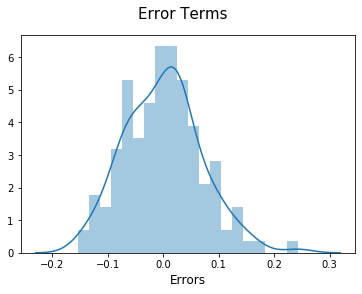

In [45]:
#Histogram for error terms
fig=plt.figure()
sns.distplot((y_train-y_train_predict),bins=20)
fig.suptitle('Error Terms',fontsize=15)
plt.xlabel('Errors',fontsize=12)
plt.show()

In [46]:
#Making predictions using the final model
df_test.loc[:,'wheelbase':'price']=scaler.transform(df_test.loc[:,'wheelbase':'price'])
df_test.head()

,car_ID,symboling,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,...,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
160,161,0,1,1,0,1,0.313793,0.409756,0.341667,0.460177,...,0,0,0,1,0,0,0,0,0,0
186,187,2,1,1,0,1,0.368966,0.497561,0.433333,0.699115,...,0,0,0,0,0,0,0,1,0,0
59,60,1,1,1,1,1,0.420690,0.596748,0.516667,0.522124,...,0,0,0,1,0,0,0,0,0,0
165,166,1,1,1,1,1,0.272414,0.448780,0.308333,0.424779,...,0,0,0,0,0,0,0,1,0,0
140,141,2,1,1,1,1,0.231034,0.263415,0.291667,0.699115,...,0,0,0,1,0,0,0,0,0,0


In [47]:
df_test.describe()

,car_ID,symboling,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,...,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
count,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,...,62.0,62.0,62.0,62.000000,62.0,62.000000,62.000000,62.000000,62.000000,62.000000
mean,113.322581,0.919355,0.887097,0.822581,0.435484,0.967742,0.437764,0.559481,0.480376,0.559663,...,0.0,0.0,0.0,0.258065,0.0,0.112903,0.016129,0.500000,0.048387,0.016129
std,59.300782,1.358620,0.319058,0.385142,0.499868,0.178127,0.212861,0.189947,0.165440,0.215811,...,0.0,0.0,0.0,0.441142,0.0,0.319058,0.127000,0.504082,0.216335,0.127000
min,4.000000,-2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.056911,0.183333,0.141593,...,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,67.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.313793,0.459350,0.358333,0.384956,...,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
50%,117.500000,1.000000,1.000000,1.000000,0.000000,1.000000,0.387931,0.547967,0.441667,0.588496,...,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.500000,0.000000,0.000000
75%,167.500000,2.000000,1.000000,1.000000,1.000000,1.000000,0.570690,0.719919,0.516667,0.699115,...,0.0,0.0,0.0,0.750000,0.0,0.000000,0.000000,1.000000,0.000000,0.000000
max,202.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.182759,1.089431,0.975000,1.061947,...,0.0,0.0,0.0,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000


In [48]:
y_test=df_test.pop('price')
x_test=df_test

In [49]:
x_train_lm2_remaining.columns

Index(['enginelocation', 'carwidth', 'enginesize', 'Company_bmw',
       'cylindernumber_three', 'cylindernumber_two'],
      dtype='object')

In [50]:
#Using our model for predictions
x_test_newdf=x_test[x_train_lm2_remaining.columns]
x_test_newdf.head()

,enginelocation,carwidth,enginesize,Company_bmw,cylindernumber_three,cylindernumber_two
160,1,0.341667,0.139623,0,0,0
186,1,0.433333,0.181132,0,0,0
59,1,0.516667,0.230189,0,0,0
165,1,0.308333,0.139623,0,0,0
140,1,0.291667,0.177358,0,0,0


In [51]:
#Adding a constant
x_test_newdf=sm.add_constant(x_test_newdf)

In [52]:
y_pred=lm2.predict(x_test_newdf)
y_pred.head()

160    0.068476
186    0.142788
59     0.218485
165    0.052309
140    0.071365
dtype: float64

In [53]:
y_test.head()

160    0.072382
186    0.093295
59     0.102964
165    0.115479
140    0.068652
Name: price, dtype: float64

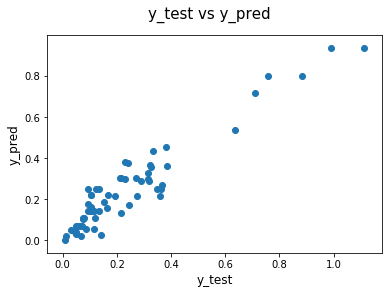

In [54]:
#Model Evaluation
fig=plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred',fontsize=15)
plt.xlabel('y_test',fontsize=12)
plt.ylabel('y_pred',fontsize=12)
plt.show()

In [55]:
#Calculate R-Squared score
from sklearn.metrics import r2_score
print(r2_score(y_test, y_pred))

0.901344352281686


## Equation best fitted

price=0.4850*carwidth-0.4454*enginelocation+0.7192*enginesize+0.2459*Company_bmw+0.1665*cylindernumber_two+0.1986*cylindernumber_three

## Q: Which variables are significant in predicting the price of a car

From the final prediction model lm2, we have identified that __carwidth,enginelocation,enginesize,car company as BMW,cylinder_two and cylinder_three__ are significant in predicting the price of the car.

## Q: How well those variables describe the price of a car

When significant variables are used the dataset was able to account for __90.1%__ of the variability of the price. Hence this is a good model to predict the price.

# Conclusion:

The __lm2__ model has a __r2-value__ as __89.7__ and __adjusted_r2_value__ as __89.2__ which provides as a good model as tested with the test data set which has a __r2-value__ as __90.1__. This model fits suitably to predict the price of the cars which can help Geely cars understand the factors significant for pricing of cars.